In [1]:
#| default_exp explore_data

# Explore data

In [2]:
#|hide
from nbdev.showdoc import *

In [3]:
#|hide
#|export
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ML_projects import const_vals as CONST


C:\Users\USER\AppData\Local\Temp\ipykernel_19416\2295213980.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
#|export


class DataExploration():


  def __init__(self,
               path_to_data : str , #path to read the data the will be analyzied 
               cols_for_analysis: list , # list with columns to be analysed
               gt_col : str , #name of the ground truth column 
               ):
    

    self.cols_for_analysis = cols_for_analysis
    self.gt_col = gt_col

    # read the dataframe 
    try:
      self.df = pd.read_csv(path_to_data)

    except Exception as e:
      error_str = CONST.ERROR_READ_DF + str(e)
      print(error_str)

    
    for col in self.cols_for_analysis:

      self._generate_histogram_(col_name = col)



  def _generate_histogram_(self,
                           col_name : str , # column name to be useed for analysis
                           ):
    
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(self.df[col_name], bins=CONST.BINS_HIST, 
             color=CONST.COLOSR_HIST, 
             alpha=CONST.ALPHA_HIST)
    
   
    plt.title(CONST.TITLE_HIST + col_name)
    plt.xlabel(CONST.X_LABEL_HIST)
    plt.ylabel(col_name)
    plt.grid(CONST.TO_GRID)
    plt.show()


  def _scatter_plots_gt_(self):

    


    




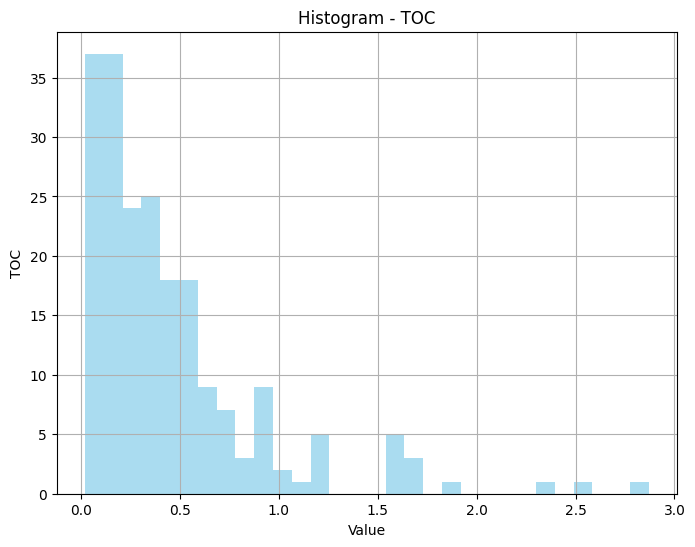

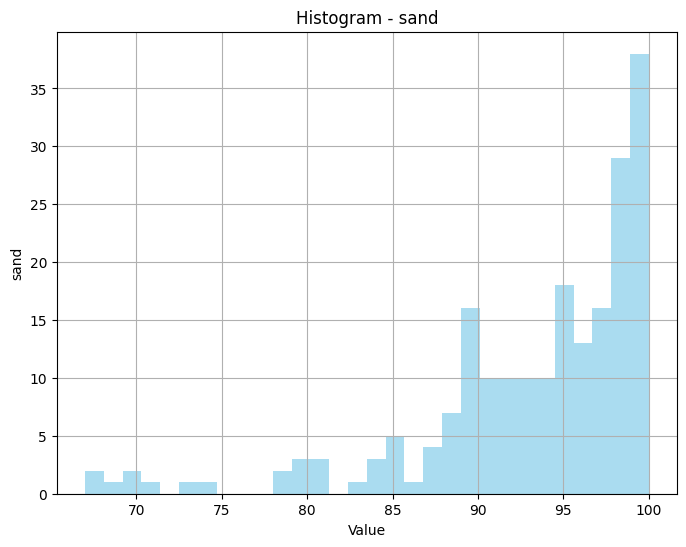

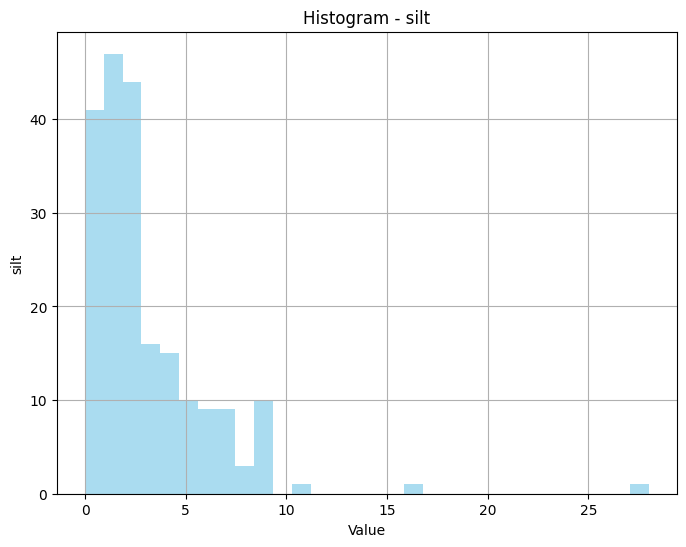

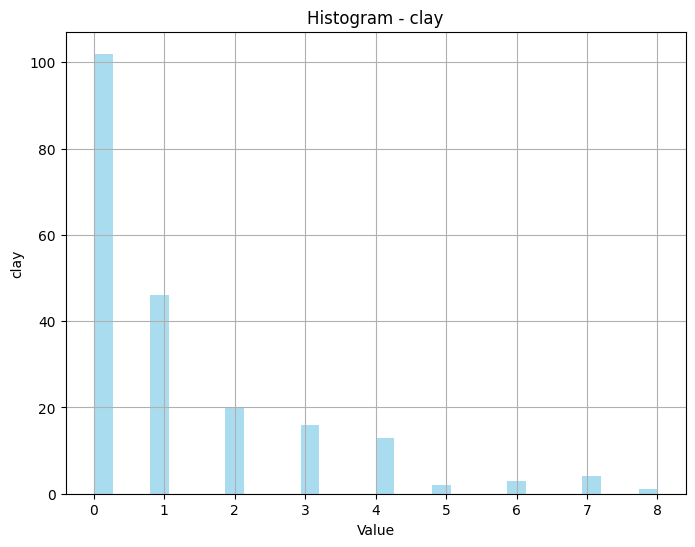

In [14]:
instance = DataExploration(path_to_data= r"D:\git\ML_projects\nbs\data\resampled_sen2_v1.csv",
                           cols_for_analysis = ['TOC' ,'sand','silt','clay'])


In [13]:
test=instance.df
test1 = test[test['TOC']<3]
test1.to_csv('data/resampled_sen2_v1.csv')

In [19]:

test2 = test[test['silt']<25]
# test2.to_csv('data/resampled_sen2_v2.csv')

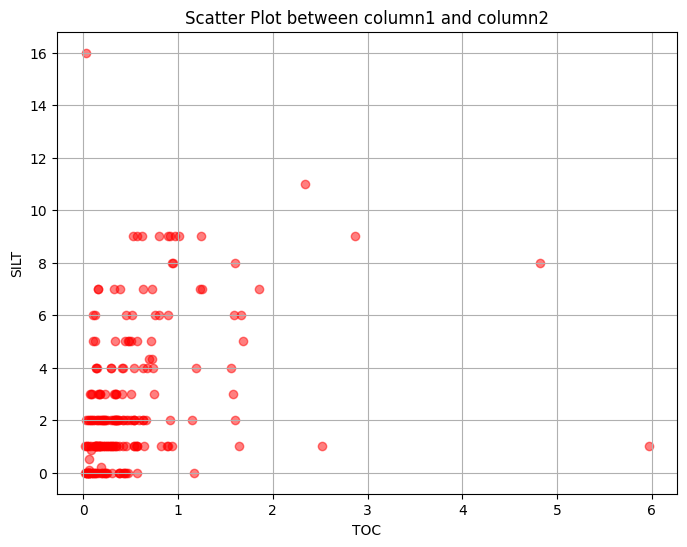

In [20]:
# Extract the columns for the scatter plot
x = test2['TOC']
y = test2['silt']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', alpha=0.5)
plt.title('Scatter Plot between column1 and column2')
plt.xlabel('TOC')
plt.ylabel('SILT')
plt.grid(True)